In [186]:
import pandas as pd 
import numpy as np 
import folium 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from folium.plugins import MarkerCluster

data = pd.read_csv('obs_data.csv')

In [187]:
# Display the shape of the dataset
print("Shape of dataset:", data.shape)
print("-----------------------------------------------")


Shape of dataset: (2401, 6)
-----------------------------------------------


In [188]:
# Display the first few rows of the dataset
print("First few rows of dataset:")
print(data.head())
print("-----------------------------------------------")

First few rows of dataset:
                                     Id            Date and Time  \
0  EE36CD18-C241-4D99-8AE6-F742E338F762  2023-07-31 08:27:45.673   
1  82762245-A1A0-4B6F-A398-6173B6753D35  2023-07-31 08:29:37.313   
2  02DB09EF-259F-42AE-8B6D-82CF57F09F97  2023-07-31 08:36:16.013   
3  D286127D-3CDB-4139-844A-2C8F83EE6DC1  2023-07-31 08:40:48.107   
4  CD5A0B06-0809-46D8-AA07-E5CEBA4E1637  2023-07-31 14:12:05.247   

                                Location  \
0  51.84798068852703, 0.7235662347445372   
1  51.84798068852703, 0.7235662347445372   
2  51.84798068852703, 0.7235662347445372   
3  51.84798068852703, 0.7235662347445372   
4                                    NaN   

                                          Category Admin close out comment  \
0           Environment - Pollution - Water course                     NaN   
1  Environment - Resources (energy/water/material)                     NaN   
2  Environment - Resources (energy/water/material)               

In [189]:
# Check for missing values
print("Missing values in dataset:")
print(data.isnull().sum())
print("-----------------------------------------------")

Missing values in dataset:
Id                            0
Date and Time                 0
Location                    440
Category                      0
Admin close out comment    1416
Sentiment                     6
dtype: int64
-----------------------------------------------


In [190]:
# Calculate summary statistics
print("Summary statistics of dataset:")
print(data.describe())

Summary statistics of dataset:
                                          Id            Date and Time  \
count                                   2401                     2401   
unique                                  1939                     1939   
top     FF32DFA2-4A93-4957-902A-D6E38A8CC2B4  2023-11-02 08:33:16.130   
freq                                       4                        4   

                    Location               Category Admin close out comment  \
count                   1961                   2401                     985   
unique                  1100                     43                     795   
top     51.510445, -0.089124  Safety - Housekeeping           Good practice   
freq                      80                    377                      87   

       Sentiment  
count       2395  
unique         2  
top       Hazard  
freq        1372  


In [191]:
data = data[data['Location'].notna()]

In [192]:
print(data.isnull().sum(), data.shape)

Id                            0
Date and Time                 0
Location                      0
Category                      0
Admin close out comment    1166
Sentiment                     6
dtype: int64 (1961, 6)


In [193]:
data[['latitude', 'longitude']] = data['Location'].str.split(', ', expand=True)

data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')

data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')

data = data.drop(['Location'], axis=1)

data.head()

,Id,Date and Time,Category,Admin close out comment,Sentiment,latitude,longitude
0,EE36CD18-C241-4D99-8AE6-F742E338F762,2023-07-31 08:27:45.673,Environment - Pollution - Water course,NaN,Good Practice,51.847981,0.723566
1,82762245-A1A0-4B6F-A398-6173B6753D35,2023-07-31 08:29:37.313,Environment - Resources (energy/water/material),NaN,Good Practice,51.847981,0.723566
2,02DB09EF-259F-42AE-8B6D-82CF57F09F97,2023-07-31 08:36:16.013,Environment - Resources (energy/water/material),NaN,Good Practice,51.847981,0.723566
3,D286127D-3CDB-4139-844A-2C8F83EE6DC1,2023-07-31 08:40:48.107,Environment - Ecology and Vegetation,NaN,Good Practice,51.847981,0.723566
5,66E72903-B1F2-4275-9D16-0E3D8B98A257,2023-08-01 07:25:42.810,Environment - Archaeology / Heritage,NaN,Hazard,51.847673,0.735153


In [194]:
data['Date and Time'] = pd.to_datetime(data['Date and Time'])

data['Date'] = data['Date and Time'].dt.date

data['Time'] = data['Date and Time'].dt.hour

data = data.drop(['Date and Time'], axis=1)

data.head()

,Id,Category,Admin close out comment,Sentiment,latitude,longitude,Date,Time
0,EE36CD18-C241-4D99-8AE6-F742E338F762,Environment - Pollution - Water course,NaN,Good Practice,51.847981,0.723566,2023-07-31,8
1,82762245-A1A0-4B6F-A398-6173B6753D35,Environment - Resources (energy/water/material),NaN,Good Practice,51.847981,0.723566,2023-07-31,8
2,02DB09EF-259F-42AE-8B6D-82CF57F09F97,Environment - Resources (energy/water/material),NaN,Good Practice,51.847981,0.723566,2023-07-31,8
3,D286127D-3CDB-4139-844A-2C8F83EE6DC1,Environment - Ecology and Vegetation,NaN,Good Practice,51.847981,0.723566,2023-07-31,8
5,66E72903-B1F2-4275-9D16-0E3D8B98A257,Environment - Archaeology / Heritage,NaN,Hazard,51.847673,0.735153,2023-08-01,7


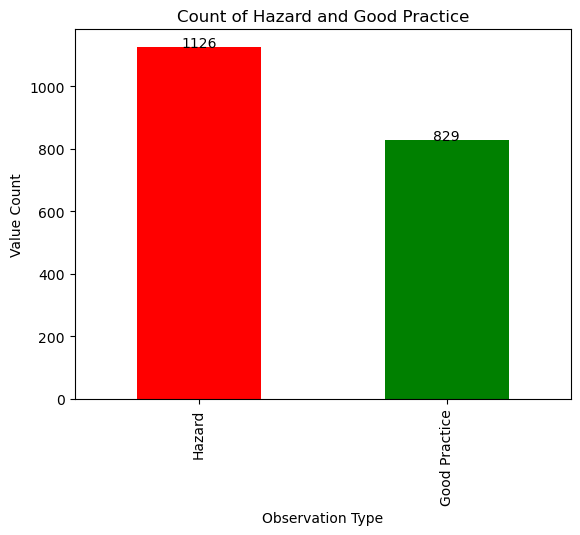

In [195]:
obs_type = data.Sentiment.value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Count of Hazard and Good Practice')
plt.xlabel('Observation Type')
plt.ylabel('Value Count')

for i, j in enumerate(data.Sentiment.value_counts()):
    obs_type.text(i, j + 0.1, str(j), color='black', ha='center')

Text(0, 0.5, 'Value Count')

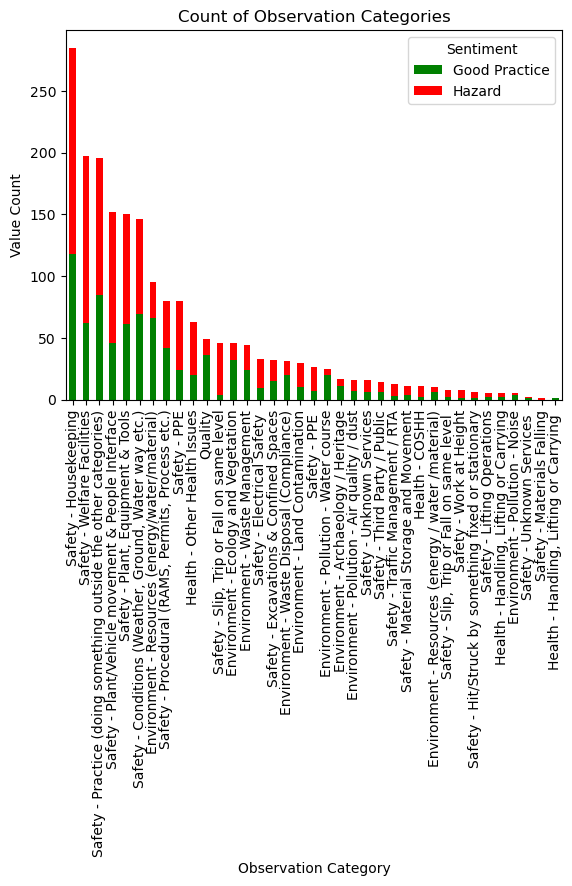

In [196]:
category_count_with_type = pd.crosstab(data.Category, data.Sentiment)

category_count_with_type = category_count_with_type.loc[category_count_with_type.sum(axis=1).sort_values(ascending=False).index]


category = category_count_with_type.plot(kind='bar', color=['green', 'red'], stacked=True)
plt.title('Count of Observation Categories')
plt.xlabel('Observation Category')
plt.ylabel('Value Count')


In [197]:
map_centre = [data.latitude.iloc[0], data.longitude.iloc[0]]

obs_map = folium.Map(location=map_centre, zoom_start=10)

for index, row in data.iterrows():
    color = 'green' if row.Sentiment == 'Good Practice' else 'red'
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color=color)
        
    ).add_to(obs_map)

obs_map

In [198]:
data_sum_of_squares = []

X = data[['Time']]

for item in range(1, 10):
    kmeans_cluster = KMeans(n_clusters=item, random_state=1)
    kmeans_cluster.fit(X)
    data_sum_of_squares.append(kmeans_cluster.inertia_)

c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

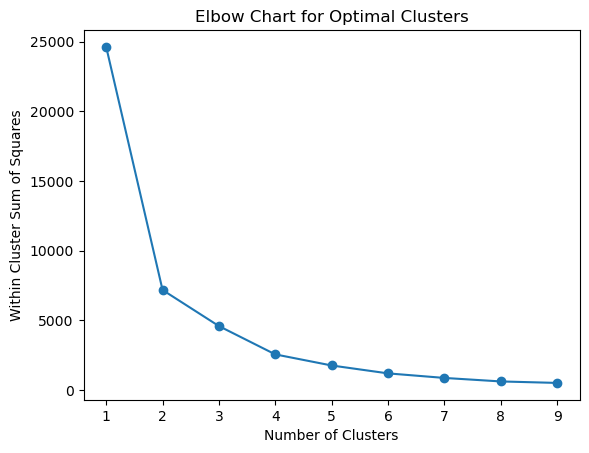

In [199]:
plt.plot(range(1, 10), data_sum_of_squares, marker='o')
plt.title('Elbow Chart for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [204]:
clusters = 4

clustering = KMeans(n_clusters=clusters, random_state=1)
data['Cluster'] = clustering.fit_predict(X)




c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster', ylabel='count'>

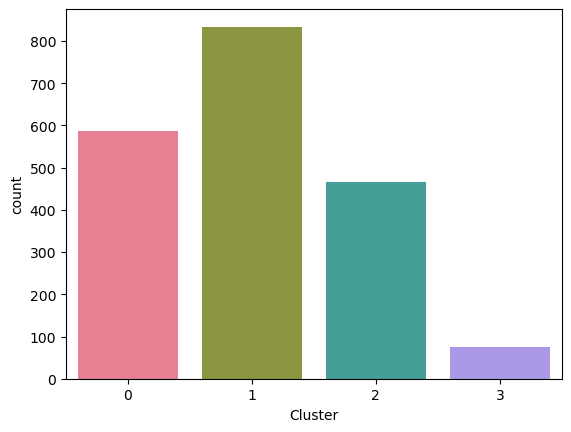

In [208]:
cluster_colours = sns.color_palette('husl', n_colors=clusters)


fig, ax = plt.subplots()
sns.countplot(x='Cluster', data=data, palette=cluster_colours)

In [203]:

my_map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(my_map)

for cluster in data['Cluster'].unique():
    subset = data[data['Cluster'] == cluster]
    for index, row in subset.iterrows():
        location = [row['latitude'], row['longitude']]
        popup = f"Cluster: {cluster}, Time: {row['Time']}"
        folium.Marker(location=location, popup=popup).add_to(marker_cluster)

my_map

In [ ]:
data.dtypes

Id                          object
Category                    object
Admin close out comment     object
Sentiment                   object
latitude                   float64
longitude                   object
Date                        object
Time                         int32
Cluster                      int32
dtype: object

c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


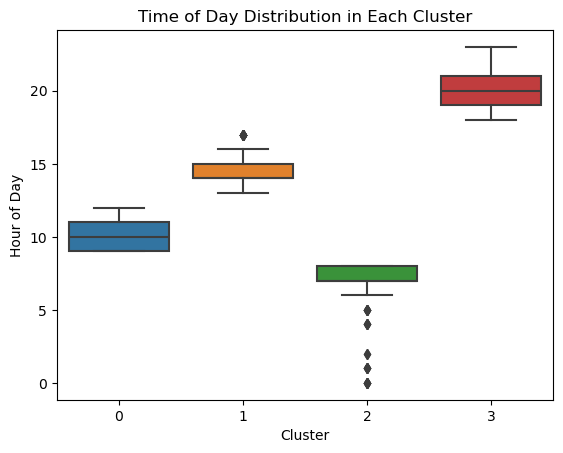

In [ ]:
sns.boxplot(x='Cluster', y='Time', data=data)
plt.title('Time of Day Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Hour of Day')
plt.show()